In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [201]:
dataset = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022copy3.csv")

In [202]:
checkpoint = ModelCheckpoint('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_4.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [203]:
print(dataset)

         Tanggal OriginTime  Latitude  Longitude  Kedalaman (km)  Magnitude  \
0       1/1/2017   04:58:14   -8.9300   110.0500              10        4.0   
1       1/2/2017   21:02:24   -8.9400   108.7500              10        5.3   
2       1/3/2017   03:52:37   -8.3900   110.6900              10        3.1   
3       1/4/2017   00:44:38   -9.2700   113.4800              10        3.4   
4       1/5/2017   20:07:56   -9.8100   111.7500              10        3.2   
...          ...        ...       ...        ...             ...        ...   
2177  12/27/2022   00:38:27   -7.8601   110.5298              13        1.3   
2178  12/28/2022   02:19:49   -8.8718   112.4565              44        3.2   
2179  12/29/2022   00:33:56   -9.0316   112.1481              10        3.2   
2180  12/30/2022   00:02:38  -10.2996   113.2803              10        3.6   
2181  12/31/2022   01:02:38  -10.2996   113.2803              10        3.6   

     Type                                         K

In [204]:
train_dates = pd.to_datetime(dataset['Tanggal'])

In [205]:
data = dataset[['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']]
values = data.values
values = values.astype('float64')

In [206]:
values.dtype

dtype('float64')

In [207]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [208]:
data_for_training = data[['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']].astype(float)

In [209]:
scaler = StandardScaler()
scaler = scaler.fit(data_for_training)
data_for_training_scaled = scaler.transform(data_for_training)

In [210]:
train_X = []
train_y = []

In [211]:
n_future = 1
n_past = 30

for i in range(n_past, len(data_for_training_scaled) - n_future +1):
    train_X.append(data_for_training_scaled[i - n_past:i, 0:data_for_training.shape[1]])
    train_y.append(data_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [212]:
train_X, train_y = np.array(train_X), np.array(train_y)

In [213]:
X_training, X_test, y_training, y_test  = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [214]:
print(X_training.shape, y_training.shape, X_test.shape, y_test.shape)

(1721, 30, 4) (1721, 1) (431, 30, 4) (431, 1)


In [215]:
print('train_X shape =={}.'.format(train_X.shape))
print('train_y shape =={}.'.format(train_y.shape))

train_X shape ==(2152, 30, 4).
train_y shape ==(2152, 1).


In [216]:
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Second LSTM layer
model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Third LSTM layer
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Fourth LSTM layer
model.add(LSTM(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# The output layer
model.add(Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 30, 128)           68096     
                                                                 
 dropout_13 (Dropout)        (None, 30, 128)           0         
                                                                 
 batch_normalization_12 (Bat  (None, 30, 128)          512       
 chNormalization)                                                
                                                                 
 lstm_34 (LSTM)              (None, 30, 128)           131584    
                                                                 
 dropout_14 (Dropout)        (None, 30, 128)           0         
                                                                 
 batch_normalization_13 (Bat  (None, 30, 128)          512       
 chNormalization)                                     

In [217]:
optimizer=Adam(learning_rate=0.003)

In [218]:
model.compile(optimizer=optimizer, loss='mse')

In [219]:
history = model.fit(X_training, y_training, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2, callbacks=[checkpoint])

Epoch 1/100



Epoch 1: val_loss improved from inf to 1.23323, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
54/54 - 13s - loss: 2.0413 - val_loss: 1.2332 - 13s/epoch - 238ms/step
Epoch 2/100

Epoch 2: val_loss did not improve from 1.23323
54/54 - 8s - loss: 1.1446 - val_loss: 1.2399 - 8s/epoch - 145ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.23323 to 1.22982, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
54/54 - 8s - loss: 1.0341 - val_loss: 1.2298 - 8s/epoch - 145ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 1.22982
54/54 - 8s - loss: 0.9875 - val_loss: 1.2392 - 8s/epoch - 146ms/step
Epoch 5/100

Epoch 5: val_loss did not improve from 1.22982
54/54 - 8s - loss: 0.9825 - val_loss: 1.2510 - 8s/epoch - 151ms/step
Epoch 6/100

Epoch 6: val_loss did not improve from 1.22982
54/54 - 7s - loss: 0.9561 - val_loss: 1.2403 - 7s/epoch - 136ms/step
Epoch 7/100

Epoch 7: val_loss did not improve from 1.22982
54/5

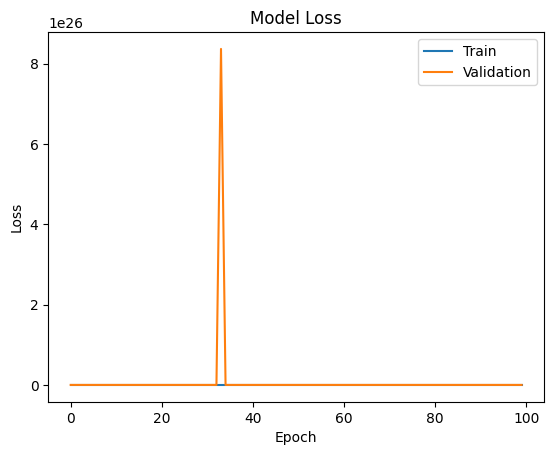

In [220]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [221]:
model = load_model("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_4.h5")
loss = model.evaluate(X_test, y_test)
print("Loss:", loss)

14/14 [==============================] - 1s 39ms/step - loss: 1.2218
Loss: 1.2218453884124756


In [222]:
n_past = 1
n_days_for_prediction=366
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='1d').tolist()
print(predict_period_dates)

[Timestamp('2022-12-31 00:00:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00'), Timestamp('2023-01-06 00:00:00'), Timestamp('2023-01-07 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-16 00:00:00'), Timestamp('2023-01-17 00:00:00'), Timestamp('2023-01-18 00:00:00'), Timestamp('2023-01-19 00:00:00'), Timestamp('2023-01-20 00:00:00'), Timestamp('2023-01-21 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-23 00:00:00'), Timestamp('2023-01-24 00:00:00'), Timestamp('2023-01-25 00:00:00'), Timestamp('2023-01-26 00:00:00'), Timestamp('2023-01-27 00:00:00'), Timestamp('2023-01-28 00:00:00'), Timestamp('20

In [223]:
prediction = model.predict(X_training[-n_days_for_prediction:])

12/12 [==============================] - 1s 39ms/step


In [224]:
print(prediction)

[[-1.41829113e-02]
 [-3.26346904e-02]
 [-3.08106579e-02]
 [-1.82821192e-02]
 [-4.03510630e-02]
 [ 9.81114358e-02]
 [ 1.39211684e-01]
 [-1.13263510e-01]
 [-4.74293046e-02]
 [-6.14426807e-02]
 [-1.20285727e-01]
 [-2.22940184e-02]
 [-1.54100591e-02]
 [-1.47415819e-02]
 [-5.39716929e-02]
 [-5.67428358e-02]
 [-1.41734490e-02]
 [ 5.90818338e-02]
 [-6.33708481e-03]
 [-2.62738280e-02]
 [-3.91776823e-02]
 [-3.87452208e-02]
 [-4.01570983e-02]
 [-2.45378055e-02]
 [-3.73709425e-02]
 [ 1.24710230e-02]
 [-3.51688042e-02]
 [-3.08160409e-02]
 [-4.78595346e-02]
 [-1.84278041e-02]
 [-2.97241881e-02]
 [-2.26003490e-02]
 [-1.29324915e-02]
 [ 2.44827509e-01]
 [-1.00956606e-02]
 [-4.10450511e-02]
 [-1.43720778e-02]
 [ 1.20777478e-02]
 [-1.61732547e-02]
 [-1.78586751e-01]
 [-3.20044272e-02]
 [-2.39405558e-02]
 [-8.52342248e-02]
 [-1.45567665e-02]
 [-1.94787793e-02]
 [-2.58100815e-02]
 [-3.37685198e-02]
 [ 2.46964961e-01]
 [ 8.69709067e-04]
 [-2.12661289e-02]
 [-3.76506187e-02]
 [-6.48179501e-02]
 [ 3.3939767

In [225]:
prediction_copies = np.repeat(prediction, data_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,-1]
y_pred_future = np.abs(y_pred_future)

C:\Users\wajit\AppData\Local\Temp\ipykernel_4516\1641840117.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Tanggal']=pd.to_datetime(original['Tanggal'])


<Axes: xlabel='Tanggal', ylabel='Magnitude'>

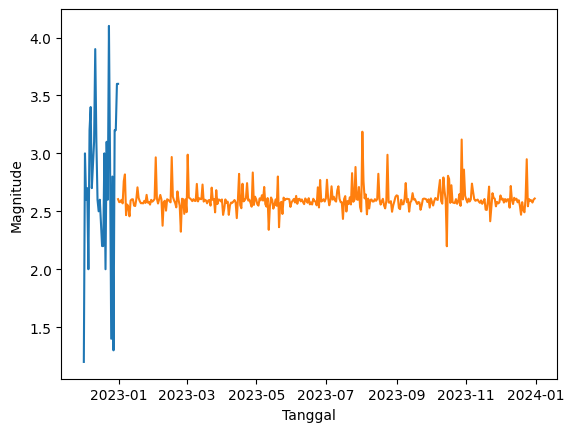

In [226]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Tanggal': np.array(forecast_dates), 'Magnitude': y_pred_future})
df_forecast['Tanggal'] = pd.to_datetime(df_forecast['Tanggal'])


original = dataset[['Tanggal', 'Magnitude']]
original['Tanggal']=pd.to_datetime(original['Tanggal'])
original = original.loc[original['Tanggal'] >= '2022-12-1']

sns.lineplot(x=original['Tanggal'], y=original['Magnitude'])
sns.lineplot(x=df_forecast['Tanggal'], y=df_forecast['Magnitude'])